# Introduction
This file creates some basic visualizations for exploring the fire dataset as it relates to the target city. The three visualizations relate to:
* Histogram of number of files within every 50 miles of target city
* Acres burned by year.
* Smoke impact and AQI by year.

The visualizations created for the target city of Pullman, WA can be found in figures.

### License
This code example was developed by Chandler Ault for use in DATA 512, a course in the UW MS Data Science degree program. This code is provided under the [Creative Commons](https://creativecommons.org) [CC-BY license](https://creativecommons.org/licenses/by/4.0/). 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geojson
import numpy as np


In [2]:
def smoke_effect(distance, acres):
  return np.exp(-distance + acres)*acres

def normalize_list(input_list):
  min_val = min(input_list)
  max_val = max(input_list)

  
  # Apply min-max scaling to each element of the list
  normalized_list = [(x - min_val) / (max_val - min_val) for x in input_list]
  
  return normalized_list

In [3]:
f = '../data/fires.json'
with open(f) as f:
    gj = geojson.load(f)
df = pd.DataFrame(gj)
df['d_norm'] = normalize_list(df['Distance'].tolist())
df['a_nrom'] = normalize_list(df['GIS_Acres'].tolist())

df['smoke_impact'] = df.apply(lambda row: smoke_effect(row['d_norm'], row['a_nrom']), axis=1)
df = df[df['Distance'] < 1250]

__Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.__

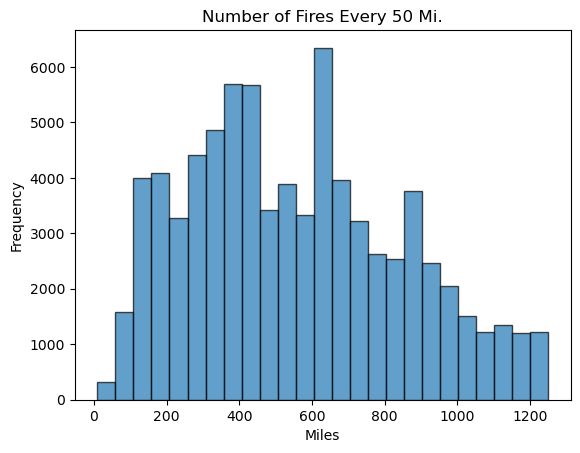

In [4]:
# Define the bin width (50 in this case)
bin_width = 50

# Calculate the number of bins
max_value = df['Distance'].max()
min_value = df['Distance'].min()
num_bins = int((max_value - min_value) / bin_width) + 1

# Create a histogram with specified bins
plt.hist(df['Distance'], bins=num_bins, edgecolor='black', alpha=0.7)

# Labeling the plot
plt.title('Number of Fires Every 50 Mi.')
plt.xlabel('Miles')
plt.ylabel('Frequency')

# Show the plot
plt.show()

__Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.__

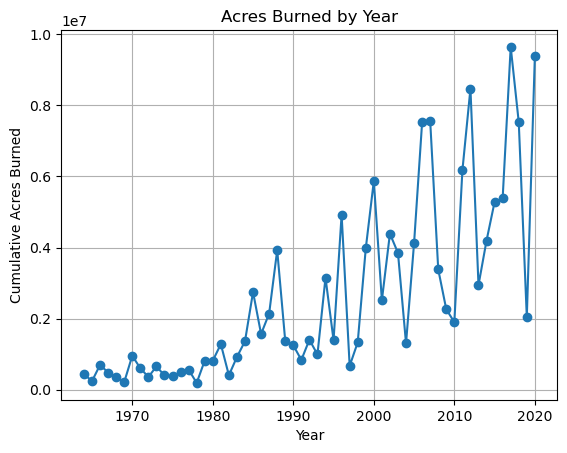

In [17]:
df_grouped = df.groupby('Fire_Year')[['GIS_Acres']].sum().reset_index()
# Create a line plot
plt.plot(df_grouped['Fire_Year'], df_grouped['GIS_Acres'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Acres Burned')
plt.title('Acres Burned by Year')

# Display the plot
plt.grid(True)  # Add grid lines
plt.show()

__Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.__

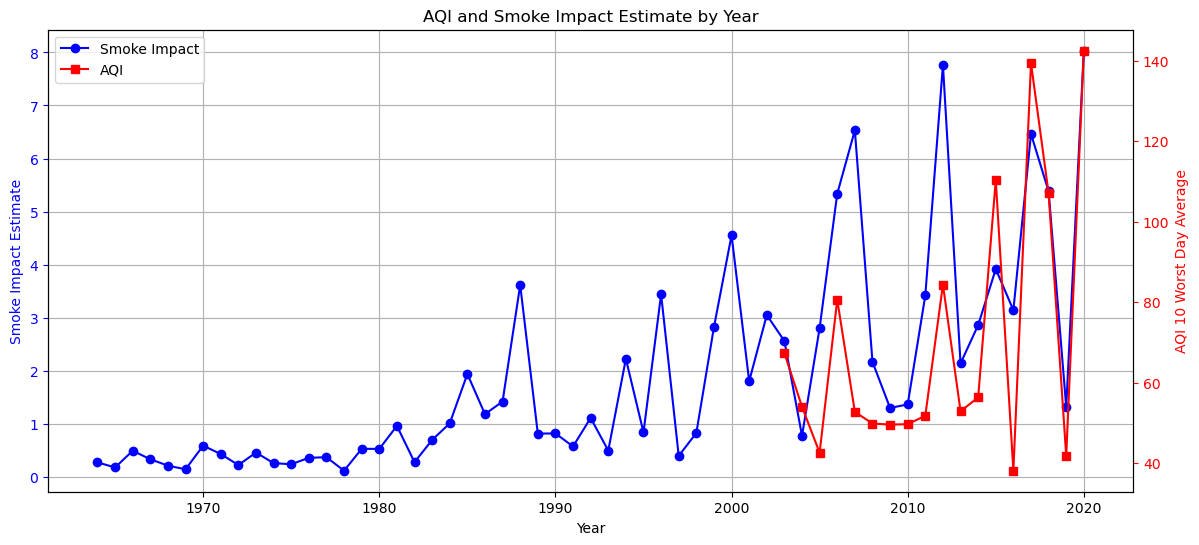

In [18]:
import matplotlib.pyplot as plt

# Create the first line plot
df_grouped = df.groupby('Fire_Year')[['smoke_impact']].sum().reset_index()
aqi_data = {2003: 673.3333333333333, 2004: 540.0, 2005: 425.66666666666663, 2006: 806.0, 2007: 527.3333333333333, 2008: 498.3333333333333, 2009: 495.66666666666674, 2010: 496.6666666666667, 2011: 517.6666666666666, 2012: 843.9999999999999, 2013: 529.0, 2014: 563.1666666666666, 2015: 1104.0, 2016: 381.00000000000006, 2017: 1394.5, 2018: 1070.6666666666667, 2019: 417.99999999999994, 2020: 1425.3333333333333}
aqi_series = pd.Series(aqi_data, name='aqi')

# Concatenate the series to the DataFrame based on the index (matching 'ID' column)
df_aqi = df_grouped.copy()
df_aqi['aqi'] = df_grouped['Fire_Year'].map(aqi_series)

# Create a figure and axis with a wider figsize
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_aqi['Fire_Year'], df_aqi['smoke_impact'], marker='o', color='b', label='Smoke Impact')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Impact Estimate', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True)

# Create the second line plot sharing the same x-axis
ax2 = ax1.twinx()

ax2.plot(df_aqi['Fire_Year'], df_aqi['aqi']/10, marker='s', color='r', label='AQI')
ax2.set_ylabel('AQI 10 Worst Day Average', color='r')
ax2.tick_params('y', colors='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Title for the combined plot
plt.title('AQI and Smoke Impact Estimate by Year')

# Display the plot
plt.show()
